In [ ]:
import os
import numpy as np
import shutil
import random

# # Creating Train / Val / Test folders (One time use)
root_dir = '/content/dataset3'
root_dir2 = '/content/train/train/'
classes_dir = os.listdir('/content/train/train')
classes_dir.sort()
val_ratio = 0.15
test_ratio = 0.05

for cls in classes_dir:
    os.makedirs(root_dir +'/training/' + cls)
    os.makedirs(root_dir +'/validation/' + cls)
    os.makedirs(root_dir +'/test/' + cls)

    # Creating partitions of the data after shuffeling
    src = root_dir2 + cls # Folder to copy images from

    allFileNames = os.listdir(src)
    np.random.shuffle(allFileNames)
    train_FileNames, val_FileNames, test_FileNames = np.split(np.array(allFileNames),
                                                              [int(len(allFileNames)* (1 - val_ratio + test_ratio)), 
                                                              int(len(allFileNames)* (1 - test_ratio))])


    train_FileNames = [src+'/'+ name for name in train_FileNames.tolist()]
    val_FileNames = [src+'/' + name for name in val_FileNames.tolist()]

    print('Total images: ', len(allFileNames))
    print('Training: ', len(train_FileNames))
    print('Validation: ', len(val_FileNames))
    print('Testing: ', len(test_FileNames))

    # Copy-pasting images
    for name in train_FileNames:
        shutil.copy(name, root_dir +'/training/' + cls)

    for name in val_FileNames:
        shutil.copy(name, root_dir +'/validation/' + cls)
    
    for name in test_FileNames:
        shutil.copy(name, root_dir +'/test/' + cls)

In [ ]:
!pip install livelossplot
!pip install efficientnet

In [ ]:
TRAINING_LOGS_FILE = "/content/drive/My Drive/Colab Notebooks/model_5_training_logs.csv"
MODEL_SUMMARY_FILE = "/content/drive/My Drive/Colab Notebooks/model_summary.txt"
MODEL_FILE = "/content/drive/My Drive/Colab Notebooks/hasil.h5"
MODEL_FILE_WEIGHT = "/content/drive/My Drive/Colab Notebooks/hasil_weight.h5"

# Data
path = "/content/dataset3/"
path2 = "/content/"
training_data_dir = path + "training"
validation_data_dir = path + "validation"
test_data_dir = path2 + "test"

In [ ]:
# Hyperparams
IMAGE_SIZE = 40
IMAGE_WIDTH, IMAGE_HEIGHT = IMAGE_SIZE, IMAGE_SIZE
EPOCHS = 20
BATCH_SIZE = 64
TEST_SIZE = 30

input_shape = (IMAGE_WIDTH, IMAGE_HEIGHT, 3)

In [1]:
import os

# The images are in a folder named 'shapes/training'
training_folder_name = 'D:\\Naufal\\Dokumen\\Python\\Dataset_image'

# All images are 128x128 pixels
img_size = (128,128)

# The folder contains a subfolder for each class of shape
classes = sorted(os.listdir(training_folder_name))
print(classes)

['cat', 'dog']


In [2]:
import sys
import keras
print('Keras version:',keras.__version__)

from keras import backend as K

Keras version: 2.4.3


In [4]:
from keras.preprocessing.image import ImageDataGenerator

batch_size = 8

print("Getting Data...")
datagen = ImageDataGenerator(rescale=1./255, # normalize pixel values
                             validation_split=0.3) # hold back 30% of the images for validation

print("Preparing training dataset...")
train_generator = datagen.flow_from_directory(
    training_folder_name,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training') # set as training data

print("Preparing validation dataset...")
validation_generator = datagen.flow_from_directory(
    training_folder_name,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation') # set as validation data

Getting Data...
Preparing training dataset...
Found 17500 images belonging to 2 classes.
Preparing validation dataset...
Found 7500 images belonging to 2 classes.


In [ ]:
# number of convolutional filters to use
nb_filters = 32
# convolution kernel size
nb_conv = 3

In [5]:
# Define a CNN classifier network
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dense
from keras import optimizers

model = Sequential()
model.add(Convolution2D(nb_filters, nb_conv, nb_conv,
                        border_mode='valid',
                        input_shape=train_generator.image_shape))
model.add(Activation('relu'))

model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(train_generator.num_classes))
model.add(Activation('softmax'))

opt = optimizers.Adam(lr=0.001)
sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)

# With the layers defined, we can now compile the model for categorical (multi-class) classification
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 123, 123, 32)      3488      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 61, 61, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 56, 56, 32)        36896     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 28, 28, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 25088)             0         
_________________________________________________________________
dense (Dense)                (None, 2)                 50178     
Total params: 90,562
Trainable params: 90,562
Non-trainable params: 0
____________________________________________________

In [6]:
# Train the model over 5 epochs
num_epochs = 5
history = model.fit_generator(
    train_generator,
    steps_per_epoch = train_generator.samples // batch_size,
    validation_data = validation_generator, 
    validation_steps = validation_generator.samples // batch_size,
    epochs = num_epochs)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/5
2187/2187 [==============================] - 258s 118ms/step - loss: 0.6951 - accuracy: 0.5094 - val_loss: 0.6910 - val_accuracy: 0.5180
Epoch 2/5
2187/2187 [==============================] - 38s 17ms/step - loss: 0.6890 - accuracy: 0.5365 - val_loss: 0.6789 - val_accuracy: 0.5606
Epoch 3/5
2187/2187 [==============================] - 38s 17ms/step - loss: 0.6798 - accuracy: 0.5621 - val_loss: 0.6726 - val_accuracy: 0.5790
Epoch 4/5
2187/2187 [==============================] - 40s 18ms/step - loss: 0.6520 - accuracy: 0.6219 - val_loss: 0.6245 - val_accuracy: 0.6588
Epoch 5/5
2187/2187 [==============================] - 215s 98ms/step - loss: 0.5919 - accuracy: 0.6909 - val_loss: 0.5830 - val_accuracy: 0.7010


In [ ]:
score, accuracy = model.evaluate(train_generator, verbose=0)
print('Test score:', score)
print('Test accuracy:', accuracy)

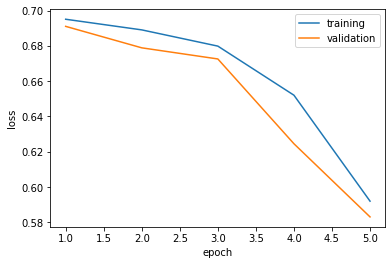

In [7]:
%matplotlib inline
from matplotlib import pyplot as plt

acc = history_fine.history['accuracy']
val_acc = history_fine.history['val_accuracy']
epoch_nums = range(1,num_epochs+1)
training_loss = history.history["loss"]
validation_loss = history.history["val_loss"]

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(epoch_nums, training_loss)
plt.plot(epoch_nums, validation_loss)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['training', 'validation'], loc='upper right')
plt.title('Training and Validation Loss')

plt.subplot(2, 1, 2)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='upper right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')
plt.show()

Generating predictions from validation data...


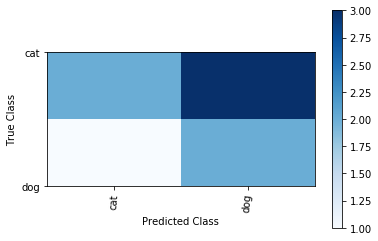

In [8]:
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

print("Generating predictions from validation data...")
# Get the image and label arrays for the first batch of validation data
x_test = validation_generator[0][0]
y_test = validation_generator[0][1]

# Use the moedl to predict the class
class_probabilities = model.predict(x_test)

# The model returns a probability value for each class
# The one with the highest probability is the predicted class
predictions = np.argmax(class_probabilities, axis=1)

# The actual labels are hot encoded (e.g. [0 1 0], so get the one with the value 1
true_labels = np.argmax(y_test, axis=1)

# Plot the confusion matrix
cm = confusion_matrix(true_labels, predictions)
plt.imshow(cm, interpolation="nearest", cmap=plt.cm.Blues)
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=85)
plt.yticks(tick_marks, classes)
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()

In [9]:
from keras.models import load_model

modelFileName = 'D:\\Naufal\\Dokumen\\Python\\Shopee\\cat_dog-classifier.h5'
model.save(modelFileName) # saves the trained model
model.save_weights('D:\\Naufal\\Dokumen\\Python\\Shopee\\cat_dog-classifier_weight.h5')
print("Model saved.")

Model saved.


In [10]:
#Load the pre-trained models
model = load_model('D:\\Naufal\\Dokumen\\Python\\Shopee\\cat_dog-classifier.h5')
model.load_weights('D:\\Naufal\\Dokumen\\Python\\Shopee\\cat_dog-classifier_weight.h5')

In [11]:
from keras.preprocessing import image
import numpy as np
pred_labels = []
def predict(file):
    x = image.load_img(file, target_size=img_size)
    x = image.img_to_array(x)
    x = np.expand_dims(x, axis=0)
    array = model.predict(x)
    for prediction in array:
        result = np.argmax(prediction)
        pred_labels.append(classes[int(result)])
    return pred_labels

In [12]:
path = 'D:\\Naufal\\Dokumen\\Python\\test\\'
paths = os.listdir('D:\\Naufal\\Dokumen\\Python\\test\\')
paths.sort()

In [13]:
import tqdm
for gambar in paths:
    imag = path+gambar
    predict(imag)

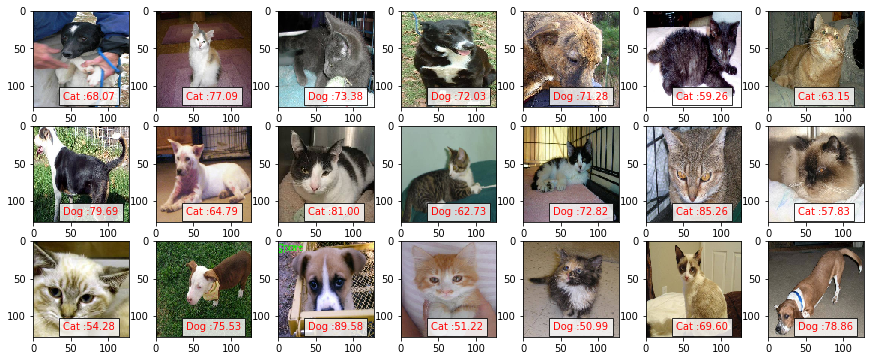

In [31]:
fig=plt.figure(figsize=(15, 6))
columns = 7
rows = 3
for i in range(columns*rows):
    fig.add_subplot(rows, columns, i+1)
    img1 = image.load_img(path+paths[i], target_size=(128, 128))
    img = image.img_to_array(img1)
    img = img/255
    img = np.expand_dims(img, axis=0)
    prediction = model.predict(img, batch_size=None,steps=1) #gives all class prob.
    for index,predict in prediction:
        if(predict>0.5):
            value ='Dog :%1.2f'%(predict*100)
            plt.text(40, 118,value,color='red',fontsize=10,bbox=dict(facecolor='white',alpha=0.8))
        else:
            value ='Cat :%1.2f'%(100-predict*100)
            plt.text(40, 118,value,color='red',fontsize=10,bbox=dict(facecolor='white',alpha=0.8))
    plt.imshow(img1)

In [32]:
import pandas as pd

data2 = pd.DataFrame(data={"filename": paths,"category":pred_labels})
print(data2)

        filename category
0          1.jpg      cat
1         10.jpg      dog
2        100.jpg      dog
3       1000.jpg      dog
4      10000.jpg      dog
...          ...      ...
12495   9995.jpg      cat
12496   9996.jpg      dog
12497   9997.jpg      dog
12498   9998.jpg      cat
12499   9999.jpg      dog

[12500 rows x 2 columns]


In [ ]:
data2.to_csv("/content/gdrive/My Drive/Colab Notebooks/Submission.csv",header=['filename','category'],index=None)